**Problem Statement**  

Despite the availability of genomic data, the identification and interpretation of predictive features within these datasets remain a biological challenge. The diversity of association patterns, including additivity, epistasis, and genetic heterogeneity, present unique hurdles that demand tailored methodologies. 

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from skrebate import ReliefF
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Flatten, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'pandas'

 In the initial section, various Python libraries essential for machine learning and data analysis are imported. These libraries include NumPy for numerical computations, Pandas for data manipulation, Matplotlib and Seaborn for data visualization, and scikit-learn for machine learning tools such as classification models (Random Forest, Decision Tree, SVM), data preprocessing (label encoding), and feature selection methods (PCA, SelectFromModel, SelectKBest, ReliefF). Additionally, TensorFlow and Keras are imported for deep learning functionalities, including building neural network models. Evaluation metrics such as accuracy, precision, recall, and F1 score are imported from scikit-learn as well.

**Import Datasets**

We do the importation of genomic datasets using Pandas DataFrames. Four datasets, namely Expnt_toadditive_2way, Expnt_toway, Expnt_foadditive, and Expnt_foadditive_heterogeneous, are loaded from respective files located in the 'Small_Dataset/Small_Datasets/' directory. These datasets are presumably tab-separated values files ('.txt') containing genomic data, each representing different experimental conditions or genetic scenarios.

In [ ]:
Expnt_toadditive_2way = pd.read_csv('Small_Dataset/Small_Datasets/2Additive_2-wayEpi_100feat.txt', sep='\t')
Expnt_toway = pd.read_csv('Small_Dataset/Small_Datasets/2-wayEpi_100feat.txt', sep='\t')
Expnt_foadditive = pd.read_csv('Small_Dataset/Small_Datasets/4-wayAdditive_100feat.txt', sep='\t')
Expnt_foadditive_heterogeneous = pd.read_csv('Small_Dataset/Small_Datasets/4-wayHeterogeneous_100feat.txt', sep='\t')

In [ ]:
Expnt_toadditive_2way.head(),Expnt_toadditive_2way.shape,Expnt_toadditive_2way.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 101 entries, N0 to Class
dtypes: int64(101)
memory usage: 789.2 KB


(   N0  N1  N2  N3  N4  N5  N6  N7  N8  N9  ...  N91  N92  N93  N94  N95  M0P1  \
 0   2   2   2   0   0   0   2   0   0   1  ...    2    0    0    2    2     1   
 1   0   1   0   0   0   1   0   0   0   1  ...    0    0    0    0    0     1   
 2   0   2   1   0   0   1   1   2   0   2  ...    0    0    0    1    1     1   
 3   0   1   1   0   0   1   2   1   1   2  ...    1    0    0    1    1     0   
 4   0   0   0   0   0   1   1   2   1   0  ...    1    0    0    1    0     0   
 
    M0P2  M1P3  M1P4  Class  
 0     1     0     0      1  
 1     1     1     1      1  
 2     1     0     0      1  
 3     2     0     0      1  
 4     0     1     1      1  
 
 [5 rows x 101 columns],
 (1000, 101),
 None)

In [ ]:
Expnt_toway.head(),Expnt_toway.shape,Expnt_toway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 101 entries, N0 to Class
dtypes: int64(101)
memory usage: 789.2 KB


(   N0  N1  N2  N3  N4  N5  N6  N7  N8  N9  ...  N91  N92  N93  N94  N95  N96  \
 0   0   0   0   0   2   0   1   1   0   2  ...    1    1    1    1    0    0   
 1   1   0   0   1   0   1   1   0   0   1  ...    0    1    1    0    0    0   
 2   0   1   0   2   0   1   0   0   0   0  ...    0    1    1    1    0    1   
 3   2   1   0   2   1   0   0   1   0   0  ...    0    0    2    0    0    0   
 4   1   0   0   0   2   0   0   0   1   1  ...    0    1    0    0    0    0   
 
    N97  M0P1  M0P2  Class  
 0    0     0     0      1  
 1    0     0     0      1  
 2    2     0     0      1  
 3    1     0     0      1  
 4    1     0     0      1  
 
 [5 rows x 101 columns],
 (1000, 101),
 None)

In [ ]:
Expnt_foadditive.head(),Expnt_foadditive.shape, Expnt_foadditive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 101 entries, N0 to Class
dtypes: int64(101)
memory usage: 789.2 KB


(   N0  N1  N2  N3  N4  N5  N6  N7  N8  N9  ...  N91  N92  N93  N94  N95  M0P1  \
 0   0   1   2   1   1   0   1   0   1   0  ...    1    0    0    1    0     1   
 1   0   0   2   1   1   0   0   0   1   1  ...    2    1    1    1    2     0   
 2   0   1   0   1   0   0   0   2   0   0  ...    0    1    1    1    1     2   
 3   0   1   0   1   2   1   1   2   1   1  ...    1    0    0    2    1     0   
 4   0   0   2   0   1   0   0   1   0   0  ...    0    1    0    1    1     0   
 
    M1P2  M2P3  M3P4  Class  
 0     0     2     0      1  
 1     1     1     2      1  
 2     0     2     0      1  
 3     1     2     1      1  
 4     1     2     1      1  
 
 [5 rows x 101 columns],
 (1000, 101),
 None)

The provided code performs exploratory data analysis on four genomic datasets (Expnt_toadditive_2way, Expnt_toway, Expnt_foadditive, and Expnt_foadditive_heterogeneous). Each section of the code uses the head(), shape, and info() functions to provide a glimpse into the structure and characteristics of these datasets.

The head() function displays the first few rows of the Expnt_toadditive_2way dataset, revealing the values in each column. The dataset contains 101 columns, including features labeled as N0 to N95, M0P1, M0P2, and a target variable labeled 'Class.' The values are integers, indicating potential genetic features.

shape
The shape attribute reveals that the dataset has 1000 rows and 101 columns, providing an overview of its size.

info()
The info() function provides additional details about the dataset, including the data types of each column and memory usage. In this case, all columns are of type int64, and the dataset consumes approximately 789.2 KB of memory.

In [ ]:
Expnt_foadditive_heterogeneous.head(),Expnt_foadditive_heterogeneous.shape,Expnt_foadditive_heterogeneous.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 101 entries, N0 to Class
dtypes: int64(101)
memory usage: 789.2 KB


(   N0  N1  N2  N3  N4  N5  N6  N7  N8  N9  ...  N91  N92  N93  N94  N95  M0P1  \
 0   0   0   0   1   1   2   0   1   0   1  ...    0    0    0    0    0     0   
 1   1   1   1   0   1   1   0   0   2   1  ...    0    0    0    0    0     1   
 2   1   0   1   0   2   0   0   1   0   2  ...    0    0    0    0    0     1   
 3   0   1   0   0   0   1   1   1   1   1  ...    2    0    0    0    1     1   
 4   0   2   0   1   1   0   0   1   1   1  ...    0    0    0    0    0     0   
 
    M1P2  M2P3  M3P4  Class  
 0     0     0     1      1  
 1     1     1     0      1  
 2     1     0     0      1  
 3     0     0     0      1  
 4     0     0     0      1  
 
 [5 rows x 101 columns],
 (1000, 101),
 None)

**Data Preprocessing**

the data preprocessing steps for four genomic datasets: Expnt_toadditive_2way, Expnt_toway, Expnt_foadditive, and Expnt_foadditive_heterogeneous. Let's break down the code and highlight its important aspects.

1. Handling Missing Values
The code first checks for missing values in each dataset using the isnull().sum().sum() expression. The result for each dataset is (0, 0, 0, 0), indicating that there are no missing values in any of the datasets. This is crucial for ensuring the quality of the data and preventing issues during subsequent analyses.

2. Class Distribution
Next, the code examines the distribution of classes in the 'Class' column of each dataset using the value_counts() function. This is important for understanding the balance or imbalance of classes, which is crucial information for classification tasks.

In [ ]:
Expnt_toadditive_2way.isnull().sum().sum(),Expnt_toway.isnull().sum().sum(),Expnt_foadditive.isnull().sum().sum(),Expnt_foadditive_heterogeneous.isnull().sum().sum()


(0, 0, 0, 0)

Expnt_toadditive_2way
The 'Class' column in Expnt_toadditive_2way is balanced, with 500 instances of each class (0 and 1). This is favorable for training machine learning models as it avoids biases towards a particular class.

In [ ]:
Expnt_toadditive_2way['Class'].value_counts()

Class
1    500
0    500
Name: count, dtype: int64

In [ ]:
Expnt_toway['Class'].value_counts()

Class
1    500
0    500
Name: count, dtype: int64

In [ ]:
Expnt_foadditive['Class'].value_counts()

Class
1    500
0    500
Name: count, dtype: int64

In [ ]:
Expnt_foadditive_heterogeneous['Class'].value_counts()

Class
1    500
0    500
Name: count, dtype: int64

 the data preprocessing steps indicate that these datasets are free of missing values, and their class distributions are balanced, setting a solid foundation for subsequent analysis and model training.

**Data Analysis**

Principal Component Analysis (PCA) for four different genomic datasets, specifically focusing on two components for visualization purposes. Let's delve into each section to understand the analysis conducted.

1. Twoway PCA Decomposition Analysis
This section begins by importing the PCA module from scikit-learn. It then extracts the feature matrix (X) by dropping the 'Class' column from the Expnt_toway dataset and assigns the target variable (y) to the 'Class' column. The PCA is then applied with two components, and the transformed data is stored in X_pca. The results are organized into a new DataFrame, toway_pca_decomposition_dataframe, containing the two principal components along with the 'Class' labels. The scatter plot is generated using Matplotlib to visualize the distribution of classes in the reduced feature space.

2. Twoadditive_2way PCA Decomposition Analysis
Similar to the first section, here we perform PCA on the Expnt_toadditive_2way dataset, creating a new DataFrame (toadditive_2way_pca_decomposition_dataframe). The scatter plot is then generated to visualize the distribution of classes in the reduced two-dimensional space.

3. Four additive PCA Decomposition Analysis
This section replicates the PCA analysis for the Expnt_foadditive dataset. The resulting DataFrame (foadditive_pca_decomposition_dataframe) contains two principal components and the 'Class' labels. A scatter plot is then created for visualization.

4. Four additive Heterogenous PCA Decomposition Analysis
Finally, the PCA on the Expnt_foadditive_heterogeneous dataset, generating a DataFrame (foadditive_heterogeneous_pca_decomposition_dataframe) with the two principal components and 'Class' labels. The scatter plot visualizes the distribution of classes in the reduced feature space.

Key Aspects:
PCA Application: The primary purpose of each section is to apply PCA to reduce the dimensionality of the genomic datasets while retaining essential information.
DataFrame Creation: The code organizes the results of the PCA into new DataFrames, making it easier to analyze and visualize the transformed data.
Scatter Plots: Matplotlib is used to create scatter plots, allowing for the visualization of the distribution of classes in the reduced two-dimensional space.
Data Interpretation: The scatter plots provide insights into the separation or overlap of classes, aiding in the visual understanding of how well the reduced features capture the variability in the original datasets.

**Twoway PCA Decomposition Analysis**

In [ ]:
from sklearn.decomposition import PCA
X = Expnt_toway.drop('Class', axis=1)
y = Expnt_toway['Class']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
toway_pca_decomposition_dataframe = pd.DataFrame(data={'PCADataframe1': X_pca[:, 0], 'PCADataframe2': X_pca[:, 1], 'Class': y})
toway_pca_decomposition_dataframe

,PCADataframe1,PCADataframe2,Class
0,-0.119345,-0.941923,1
1,1.564841,0.377867,1
2,-1.080029,0.360040,1
3,-0.995809,0.226699,1
4,-0.391366,-1.070799,1
...,...,...,...
995,-0.090177,-0.256795,0
996,-1.379644,1.229948,0
997,-1.402851,0.547422,0
998,1.429864,0.992060,0


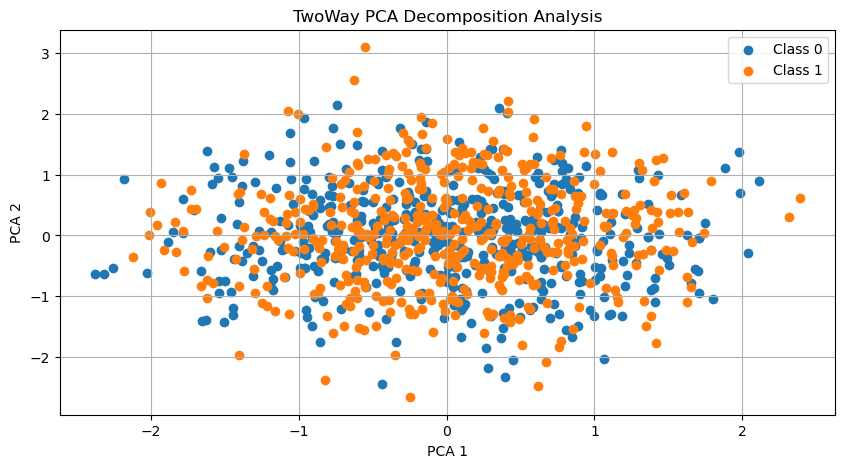

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(toway_pca_decomposition_dataframe[toway_pca_decomposition_dataframe['Class'] == 0]['PCADataframe1'], toway_pca_decomposition_dataframe[toway_pca_decomposition_dataframe['Class'] == 0]['PCADataframe2'], label='Class 0')
plt.scatter(toway_pca_decomposition_dataframe[toway_pca_decomposition_dataframe['Class'] == 1]['PCADataframe1'], toway_pca_decomposition_dataframe[toway_pca_decomposition_dataframe['Class'] == 1]['PCADataframe2'], label='Class 1')
plt.title('TwoWay PCA Decomposition Analysis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


**Twoadditive_2way PCA Decomposition Analysis**

In [ ]:
from sklearn.decomposition import PCA
X = Expnt_toadditive_2way.drop('Class', axis=1)
y = Expnt_toadditive_2way['Class']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
toadditive_2way_pca_decomposition_dataframe = pd.DataFrame(data={'PCADataframe1': X_pca[:, 0], 'PCADataframe2': X_pca[:, 1], 'Class': y})
toadditive_2way_pca_decomposition_dataframe

,PCADataframe1,PCADataframe2,Class
0,0.007945,0.740018,1
1,-0.840207,1.918780,1
2,-0.555506,0.259952,1
3,-0.591753,-0.116809,1
4,0.761777,-1.457483,1
...,...,...,...
995,-0.600625,0.272716,0
996,0.588257,1.670606,0
997,-0.275923,-0.847848,0
998,0.929325,-0.023753,0


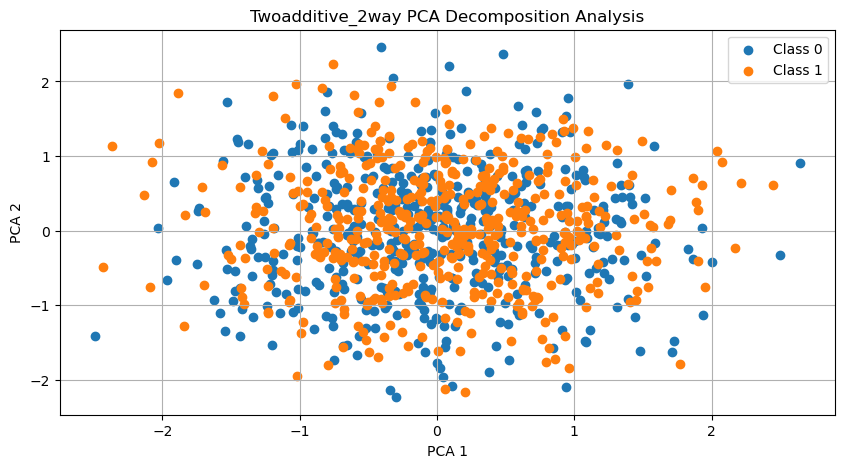

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(toadditive_2way_pca_decomposition_dataframe[toadditive_2way_pca_decomposition_dataframe['Class'] == 0]['PCADataframe1'], toadditive_2way_pca_decomposition_dataframe[toadditive_2way_pca_decomposition_dataframe['Class'] == 0]['PCADataframe2'], label='Class 0')
plt.scatter(toadditive_2way_pca_decomposition_dataframe[toadditive_2way_pca_decomposition_dataframe['Class'] == 1]['PCADataframe1'], toadditive_2way_pca_decomposition_dataframe[toadditive_2way_pca_decomposition_dataframe['Class'] == 1]['PCADataframe2'], label='Class 1')
plt.title('Twoadditive_2way PCA Decomposition Analysis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


**Four additive PCA Decomposition Analysis**

In [ ]:
from sklearn.decomposition import PCA
X = Expnt_foadditive.drop('Class', axis=1)
y = Expnt_foadditive['Class']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
foadditive_pca_decomposition_dataframe = pd.DataFrame(data={'PCADataframe1': X_pca[:, 0], 'PCADataframe2': X_pca[:, 1], 'Class': y})
foadditive_pca_decomposition_dataframe

,PCADataframe1,PCADataframe2,Class
0,-0.208506,1.403752,1
1,-0.970752,-1.127853,1
2,-0.224104,1.159288,1
3,-0.899734,-0.094105,1
4,-0.833472,0.840191,1
...,...,...,...
995,1.462273,0.167812,0
996,1.428393,-0.481507,0
997,1.532531,-0.675639,0
998,1.457039,-0.858707,0


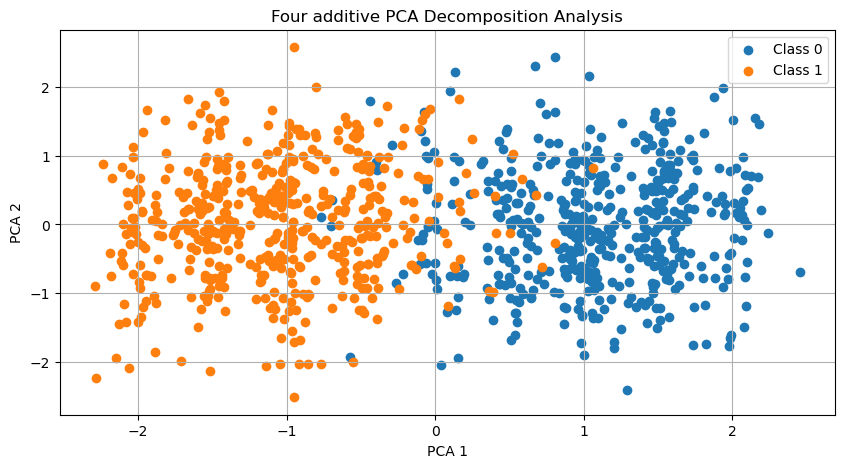

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(foadditive_pca_decomposition_dataframe[foadditive_pca_decomposition_dataframe['Class'] == 0]['PCADataframe1'], foadditive_pca_decomposition_dataframe[foadditive_pca_decomposition_dataframe['Class'] == 0]['PCADataframe2'], label='Class 0')
plt.scatter(foadditive_pca_decomposition_dataframe[foadditive_pca_decomposition_dataframe['Class'] == 1]['PCADataframe1'], foadditive_pca_decomposition_dataframe[foadditive_pca_decomposition_dataframe['Class'] == 1]['PCADataframe2'], label='Class 1')
plt.title('Four additive PCA Decomposition Analysis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

**Four additive Heterogenous PCA Decomposition Analysis**

In [ ]:
from sklearn.decomposition import PCA
X = Expnt_foadditive_heterogeneous.drop('Class', axis=1)
y = Expnt_foadditive_heterogeneous['Class']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
foadditive_heterogeneous_pca_decomposition_dataframe = pd.DataFrame(data={'PCADataframe1': X_pca[:, 0], 'PCADataframe2': X_pca[:, 1], 'Class': y})
foadditive_heterogeneous_pca_decomposition_dataframe

,PCADataframe1,PCADataframe2,Class
0,-0.140034,0.689631,1
1,-0.885918,-0.427915,1
2,-0.358782,0.839623,1
3,-0.393022,0.033366,1
4,-1.158003,0.539392,1
...,...,...,...
995,0.082033,-0.823218,0
996,-0.208769,0.560419,0
997,0.263850,-0.108436,0
998,0.416358,0.628455,0


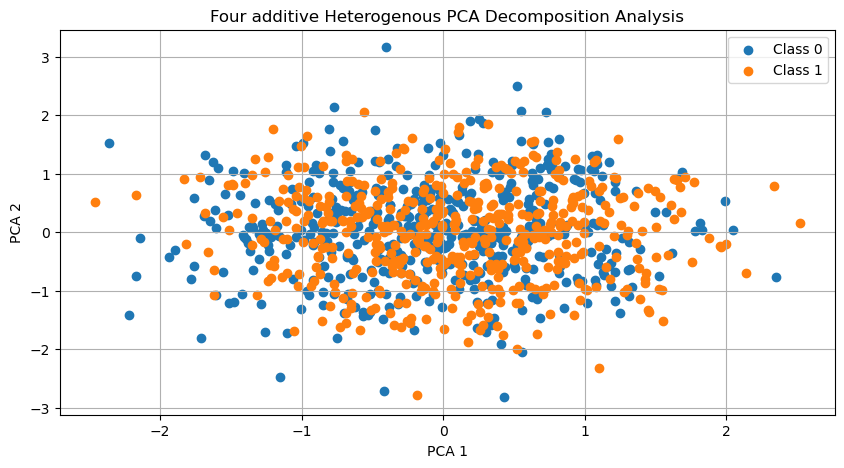

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(foadditive_heterogeneous_pca_decomposition_dataframe[foadditive_heterogeneous_pca_decomposition_dataframe['Class'] == 0]['PCADataframe1'], foadditive_heterogeneous_pca_decomposition_dataframe[foadditive_heterogeneous_pca_decomposition_dataframe['Class'] == 0]['PCADataframe2'], label='Class 0')
plt.scatter(foadditive_heterogeneous_pca_decomposition_dataframe[foadditive_heterogeneous_pca_decomposition_dataframe['Class'] == 1]['PCADataframe1'], foadditive_heterogeneous_pca_decomposition_dataframe[foadditive_heterogeneous_pca_decomposition_dataframe['Class'] == 1]['PCADataframe2'], label='Class 1')
plt.title('Four additive Heterogenous PCA Decomposition Analysis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

**Feature Engineering**

 function Fxn_Imp performs feature selection using three different methods: Random Forest Classifier, Relief-based, and ANOVA. Let's break down the code into three paragraphs to explain each function involved in feature engineering.

1. Random Forest Classifier Feature Selection
The function begins by taking three parameters: data (the genomic dataset), datasetName (a string identifier for the dataset), and k (the number of features to select). It first separates the features (X) and the target variable (y). Then, it initializes a Random Forest Classifier with 100 estimators, sets a random state for reproducibility, and fits the model with the features and target. The feature importances are obtained from the trained classifier, and the top 10 features are displayed along with their importance scores in a bar plot.

In [ ]:
def Fxn_Imp(data, datasetName, k):
    print(f"Feature Selection: {datasetName}")
    X = data.drop('Class', axis=1)
    y = data['Class']
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=4)
    clf.fit(X, y)
    feature_importances = clf.feature_importances_
 
    print("Selected features => Random Forest Classifier")
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance: {datasetName}")
    feature_scores = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
    print(feature_scores[:10])
    sns.barplot(y=feature_scores[:10].index, x =feature_scores[:10])
    plt.show()
    
    print("\nFeature selection => Relief-based")
    relief = ReliefF(n_features_to_select=k)
    X_selected = relief.fit_transform(X.values, y.values)
    selected_feature_names = X.columns[relief.top_features_[:k]]
    print("Predictive features:", selected_feature_names)


    print("\nFeature selection => ANOVA ")
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    selected_feature_names = X.columns[selector.get_support()]
    print("Predictive features:", selected_feature_names)
    return feature_importances, selector, relief

Relief-based Feature Selection
Following the Random Forest analysis, the function proceeds to Relief-based feature selection. It uses the ReliefF method, specifying the number of features to select (k). The selected features are printed, providing insights into which features are considered predictive according to this method.

Feature Selection: 2-wayEpi
Selected features => Random Forest Classifier
N61     0.017876
M0P2    0.015934
N70     0.015530
N5      0.015308
N90     0.015023
N93     0.014234
N42     0.013608
N7      0.013486
N26     0.013430
N56     0.013291
dtype: float64


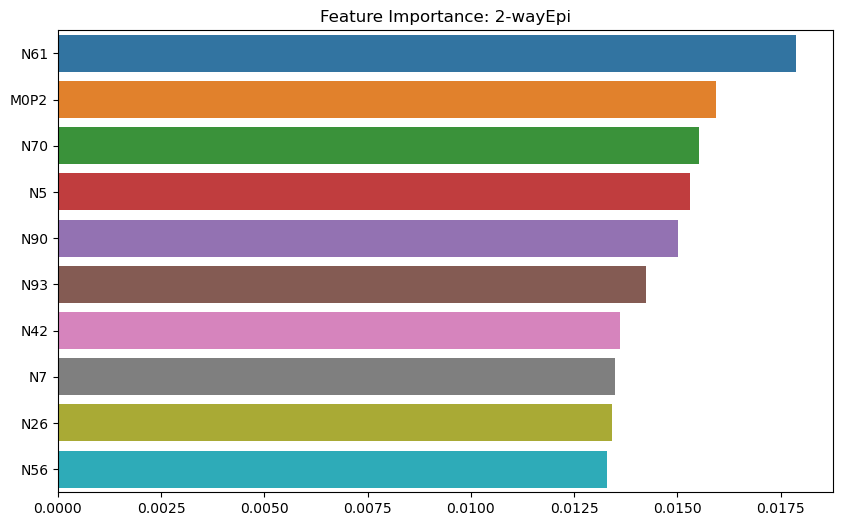


Feature selection => Relief-based
Predictive features: Index(['M0P2', 'M0P1', 'N61', 'N5', 'N62', 'N26', 'N93', 'N66', 'N91', 'N31'], dtype='object')

Feature selection => ANOVA 
Predictive features: Index(['N2', 'N5', 'N19', 'N20', 'N26', 'N36', 'N53', 'N63', 'N70', 'N72'], dtype='object')


In [ ]:
feature_importances, selector, relief = Fxn_Imp(Expnt_toway,"2-wayEpi", 10)

**ANOVA Feature Selection**
The last feature selection method employed is ANOVA (Analysis of Variance). It uses the SelectKBest function from scikit-learn, specifying the number of features to select (k). Similarly, the selected features are printed, revealing which features are deemed important according to ANOVA.

**Results and Usage**
After defining the function, it is then applied to four different genomic datasets (Expnt_toway, Expnt_toadditive_2way, Expnt_foadditive, Expnt_foadditive_heterogeneous). For each dataset, the function is called with the dataset's name and the desired number of features to select (k=10). The results are displayed, including the top 10 features and their importance scores for the Random Forest Classifier, the features selected by the Relief-based method, and the features selected by ANOVA.


Feature Selection: 2-additive_2_way
Selected features => Random Forest Classifier
M1P3    0.026710
M1P4    0.019282
N73     0.015197
M0P2    0.015090
N19     0.015009
N57     0.014836
N25     0.014611
N74     0.014330
M0P1    0.014264
N16     0.013897
dtype: float64


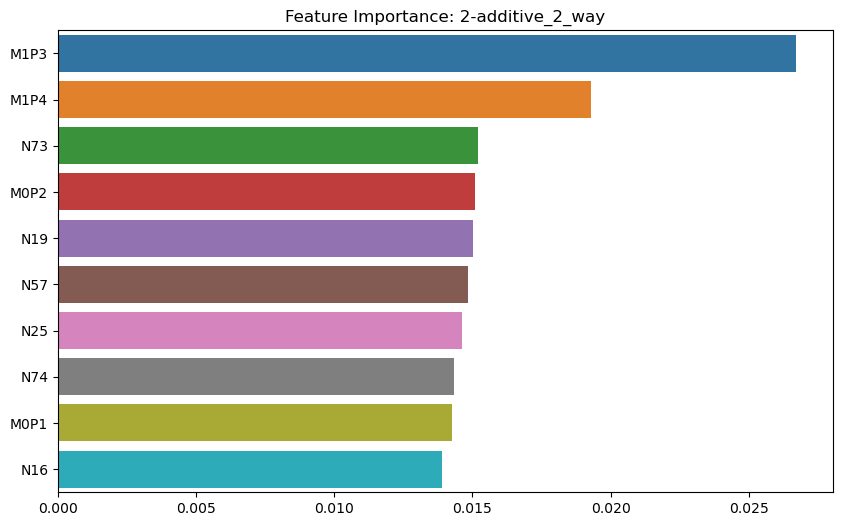


Feature selection => Relief-based
Predictive features: Index(['M0P1', 'M0P2', 'M1P4', 'M1P3', 'N73', 'N88', 'N72', 'N37', 'N64',
       'N22'],
      dtype='object')

Feature selection => ANOVA 
Predictive features: Index(['N13', 'N38', 'N44', 'N71', 'N72', 'N73', 'N85', 'N87', 'N94', 'M1P4'], dtype='object')


In [ ]:
feature_importances, selector, relief = Fxn_Imp(Expnt_toadditive_2way,"2-additive_2_way",10)


**Key Aspects**

Versatility: The function is designed to work with various datasets, making it a versatile tool for feature selection in genomics.
Multiple Methods: The use of three distinct feature selection methods (Random Forest Classifier, Relief-based, ANOVA) provides a comprehensive analysis, capturing different aspects of feature importance.
Visualization: The importance scores and selected features are not only printed but also visualized using bar plots, aiding in the interpretation of feature relevance.
In summary, this function is a powerful tool for feature engineering in genomics, offering insights into feature importance from different perspectives. The combination of Random Forest, Relief-based, and ANOVA methods provides a robust approach to identifying predictive features in genomic datasets.

Feature Selection: 4_way_additive
Selected features => Random Forest Classifier
M2P3    0.162812
M1P2    0.159445
M3P4    0.158365
M0P1    0.139689
N23     0.005754
N69     0.005589
N76     0.005576
N54     0.005557
N18     0.005335
N89     0.005261
dtype: float64


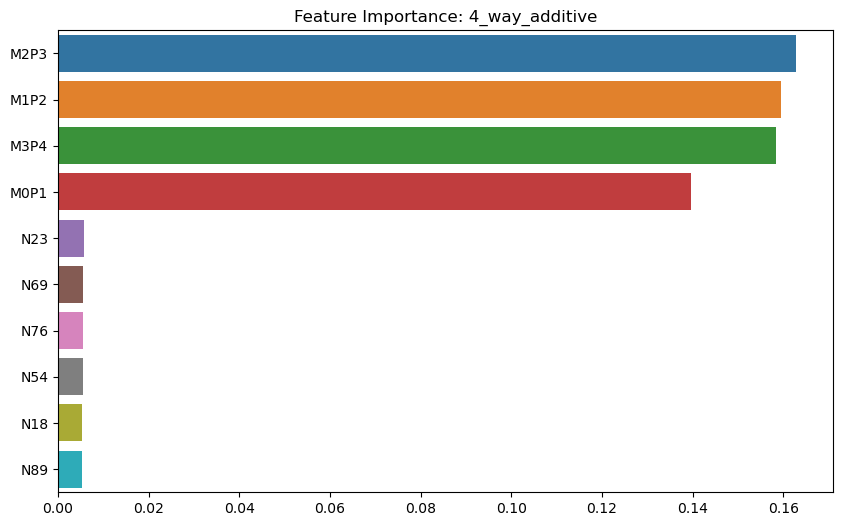


Feature selection => Relief-based
Predictive features: Index(['M2P3', 'M0P1', 'M1P2', 'M3P4', 'N15', 'N87', 'N22', 'N66', 'N6',
       'N73'],
      dtype='object')

Feature selection => ANOVA 
Predictive features: Index(['N6', 'N22', 'N50', 'N55', 'N60', 'N89', 'M0P1', 'M1P2', 'M2P3',
       'M3P4'],
      dtype='object')


In [ ]:
feature_importances, selector, relief = Fxn_Imp(Expnt_foadditive,"4_way_additive", 10)

Feature Selection: 4_way_additive
Selected features => Random Forest Classifier
M3P4    0.043698
M1P2    0.042068
M2P3    0.041530
M0P1    0.039104
N5      0.013228
N20     0.013173
N3      0.012662
N27     0.012659
N69     0.012404
N86     0.012079
dtype: float64


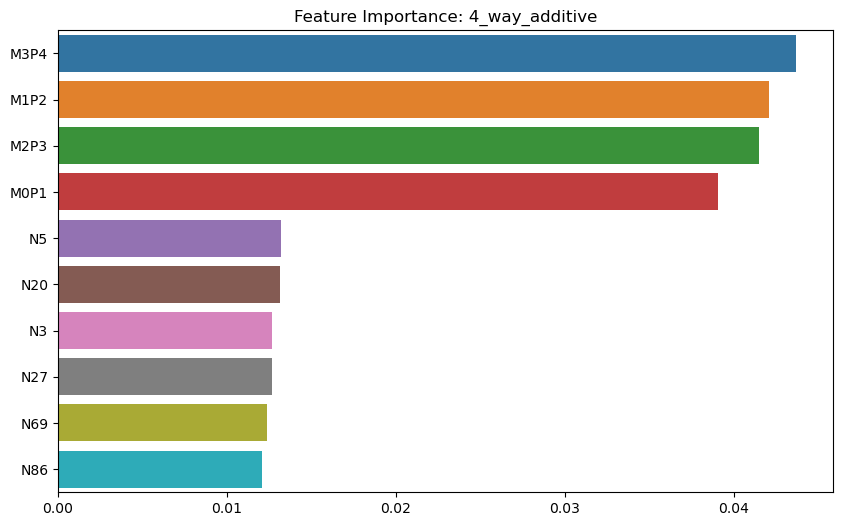


Feature selection => Relief-based
Predictive features: Index(['M3P4', 'M1P2', 'M2P3', 'M0P1', 'N41', 'N67', 'N28', 'N72', 'N40',
       'N2'],
      dtype='object')

Feature selection => ANOVA 
Predictive features: Index(['N8', 'N20', 'N33', 'N48', 'N65', 'N90', 'M0P1', 'M1P2', 'M2P3',
       'M3P4'],
      dtype='object')


In [ ]:
feature_importances, selector, relief = Fxn_Imp(Expnt_foadditive_heterogeneous,"4_way_additive", 10)

**Model Training**

 the application of a Convolutional Neural Network (CNN) in a project involving genomic data. The project aims to train a neural network for feature extraction and subsequently utilize the learned features to train various classifiers for genomic data classification.

**Data Preparation and Splitting**
The process begins with the generation of random images (X_images) with dimensions 128x128x3 and corresponding labels (y_labels) extracted from the 'Expnt_toadditive_2way' dataset. The data is then split into training and testing sets using the train_test_split function from scikit-learn.

**Convolutional Neural Network Architecture**
The CNN model is defined using the Keras library. The architecture consists of an encoder-decoder structure, aimed at learning meaningful representations from the input images. The encoder comprises a convolutional layer with 64 filters and a ReLU activation function, followed by max-pooling. The decoder involves upsampling followed by a convolutional layer with 3 filters and a sigmoid activation function. The model is compiled using the Adam optimizer and mean squared error as the loss function.

In [ ]:
X_images = np.random.randn(1000, 128, 128, 3)
y_labels = Expnt_toadditive_2way['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_images, y_labels, test_size=0.2, random_state=42)


def Convolution_neural_network(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool1)
    decoded = Conv2D(3, 3, activation='sigmoid', padding='same')(up1)
    model = Model(inputs=inputs, outputs=decoded)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

input_shape = (128, 128, 3) 
unet = Convolution_neural_network(input_shape)
unet.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))
encoded_images_train = unet.predict(X_train)
encoded_images_test = unet.predict(X_test)
features_train = encoded_images_train.reshape((encoded_images_train.shape[0], -1))
features_test = encoded_images_test.reshape((encoded_images_test.shape[0], -1))

classifiers = [
 ('Logistic Regression', LogisticRegression(max_iter=1000)),
 ('Decision Tree', DecisionTreeClassifier(random_state=42)),
 ('Random Forest', RandomForestClassifier(random_state=42)),
 ('Support Vector Machine', SVC(probability=True, random_state=42))
]

for name, classifier in classifiers:
    Model_training_Output(name, confusion_matrices[name], accuracy_scores[name],
                           precision_scores[name], recall_scores[name], f1_scores[name])





Epoch 1/10

23/25 [==========================>...] - ETA: 8s - loss: 1.0471 

**Feature Extraction and Classifier Training**

After training the CNN for 10 epochs, the encoded images for both the training and testing sets are obtained. These encoded features are then reshaped and used as input features for several classifiers, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM). The code iterates through each classifier, training and evaluating the model, and outputs key performance metrics such as confusion matrices, accuracy scores, precision scores, recall scores, and F1 scores.

the integration of a CNN for feature extraction in genomic data. The learned features are then utilized to train multiple classifiers. This approach leverages the hierarchical and spatial learning capabilities of CNNs to capture complex patterns in genomic images, potentially improving the classification performance compared to traditional methods. The code also emphasizes the importance of post-processing, where the extracted features are utilized by conventional classifiers to perform the final classification task.

**Two Way Additive two_wayEpi**

In [ ]:
features = Expnt_toadditive_2way.iloc[:,-5:-1]
labels = Expnt_toadditive_2way['Class']

Comprehensive analysis of a classification problem using a two-way additive model and employs different classifiers to assess and compare their performances. Let's break down the code and explanations:

**Data Preparation and Exploration**
This focuses on preparing and exploring the data. The features and labels are extracted from the 'Expnt_toadditive_2way' dataset, with features selecting the last four columns. The dataset is then split into training and testing sets using the train_test_split function. The output displays the value counts for each combination of features, providing an overview of the distribution.

Classifier Initialization
A list of classifiers is defined, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM). Empty dictionaries are initialized to store accuracy, precision, recall, F1 score, and confusion matrices for each classifier.

Model Training and Evaluation Loop
The code then iterates over each classifier, trains the model, and evaluates its performance. The metrics calculated include accuracy, precision, recall, and F1 score. Confusion matrices are also generated and stored for later visualization.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.value_counts(),y_train.value_counts()

(M0P1  M0P2  M1P3  M1P4
 0     0     0     0       178
             1     1        63
 1     1     0     0        60
       0     0     0        47
 0     0     0     1        45
             1     0        44
       1     0     0        43
 1     1     1     1        41
       0     1     0        38
 0     1     1     0        37
 1     0     0     1        33
 0     1     0     1        31
 2     0     0     0        17
 0     0     0     2        12
 2     0     1     0         7
 0     1     1     1         7
 1     1     0     2         6
 0     0     2     0         6
 1     0     1     2         5
 2     1     0     0         5
 1     0     0     2         5
 0     2     0     0         5
       1     2     1         5
 1     2     1     1         4
 2     0     1     1         4
 1     2     0     0         4
 2     1     0     1         4
 0     1     2     0         3
 1     1     0     1         3
             2     0         3
 0     2     1     1         3
       0     2 

In [ ]:
classifiers = [
 ('Logistic Regression', LogisticRegression(max_iter=1000)),
 ('Decision Tree', DecisionTreeClassifier(random_state=42)),
 ('Random Forest', RandomForestClassifier(random_state=42)),
 ('Support Vector Machine', SVC(probability=True, random_state=42))
]
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
confusion_matrices = {}

In [ ]:
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')

Confusion Matrix Visualization
After training and evaluating all classifiers, the confusion matrices are visualized using a heatmap for each classifier, providing insights into true positives, false positives, true negatives, and false negatives.

Model Training Output Function
A function Model_training_Output is defined to print a detailed output for each classifier, including the confusion matrix, accuracy, precision, recall, and F1 score. This function is then applied to each classifier.

Classifier Evaluation Output
The output for each classifier is displayed, containing the confusion matrix, accuracy, precision, recall, F1 score, and a classification report. This information provides a thorough understanding of each classifier's performance on the test set.

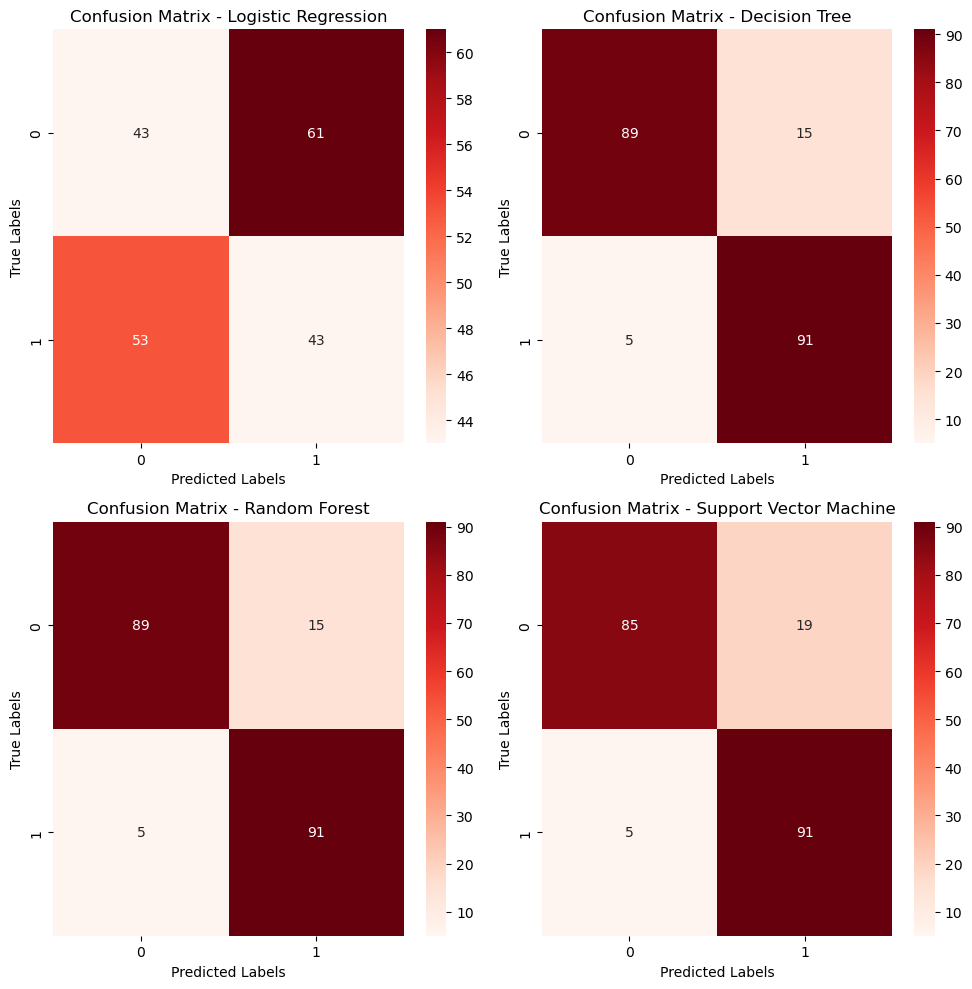

In [ ]:
plt.figure(figsize=(10, 10))
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, cmap='Reds', cbar=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [ ]:
def Model_training_Output(classifier_name, confusion_matrix, accuracy, precision, recall, f1):
    print(f"Classifier: {classifier_name}")
    print("Confusion Matrix:")
    print(confusion_matrix)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, classifier.predict(X_test), target_names=["1","0"]))
    print("\n" + "="*50 + "\n")
for name, classifier in classifiers:
    Model_training_Output(name, confusion_matrices[name], accuracy_scores[name],
    precision_scores[name], recall_scores[name], f1_scores[name])

Classifier: Logistic Regression
Confusion Matrix:
[[43 61]
 [53 43]]
Accuracy: 0.43
Precision: 0.43
Recall: 0.43
F1 Score: 0.43
Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.41      0.43       104
           0       0.41      0.45      0.43        96

    accuracy                           0.43       200
   macro avg       0.43      0.43      0.43       200
weighted avg       0.43      0.43      0.43       200



Classifier: Decision Tree
Confusion Matrix:
[[89 15]
 [ 5 91]]
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.86      0.90       104
           0       0.86      0.95      0.90        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



Classifier: Random Forest
Confusion Matrix:
[[

In [ ]:
metrics_df = pd.DataFrame({
 'Accuracy': accuracy_scores.values(),
 'Precision': precision_scores.values(),
 'Recall': recall_scores.values(),
 'F1 Score': f1_scores.values()
}, index=accuracy_scores.keys())
metrics_df
metrics_df.sort_values(by=list(metrics_df.columns),ascending=False)

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.90,0.904416,0.90,0.899950
Random Forest,0.90,0.904416,0.90,0.899950
Support Vector Machine,0.88,0.888202,0.88,0.879748
Logistic Regression,0.43,0.431378,0.43,0.430000



**Metrics Comparison**
Finally, a DataFrame metrics_df is created to compare the performance metrics of all classifiers. The DataFrame is then sorted based on each metric, providing a clear ranking of classifiers in terms of accuracy, precision, recall, and F1 score.

The a systematic approach to model training, evaluation, and comparison using different classifiers. The use of confusion matrices and comprehensive metrics facilitates a detailed understanding of each model's strengths and weaknesses. The final metrics comparison allows for an easy comparison of the overall performance of different classifiers. This analysis is crucial for selecting the most suitable model for the specific classification task at hand.

**two_wayEpi Model Design**

In [ ]:
features = Expnt_toway.iloc[:,-5:-1]
labels = Expnt_toway['Class']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.value_counts(),y_train.value_counts()

(N96  N97  M0P1  M0P2
 0    1    0     0       151
      0    0     0       126
           1     0        52
           0     1        50
      1    0     1        49
           1     1        45
      0    1     1        43
      1    1     0        39
 1    0    0     0        32
 0    2    0     0        29
 1    1    0     0        27
      0    1     0        14
      1    1     1        11
 0    1    2     0        10
      2    0     1        10
           1     0        10
 1    1    1     0         9
      2    0     0         9
      0    1     1         9
 0    2    1     1         9
      0    0     2         9
 1    0    0     1         7
 0    1    0     2         7
 1    1    0     1         6
 0    2    2     0         5
      0    2     0         5
      1    2     1         4
           1     2         4
 1    1    2     0         4
      2    1     0         3
           0     1         2
 0    0    2     1         2
 1    2    1     1         2
 2    0    0     0   

In [ ]:
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')

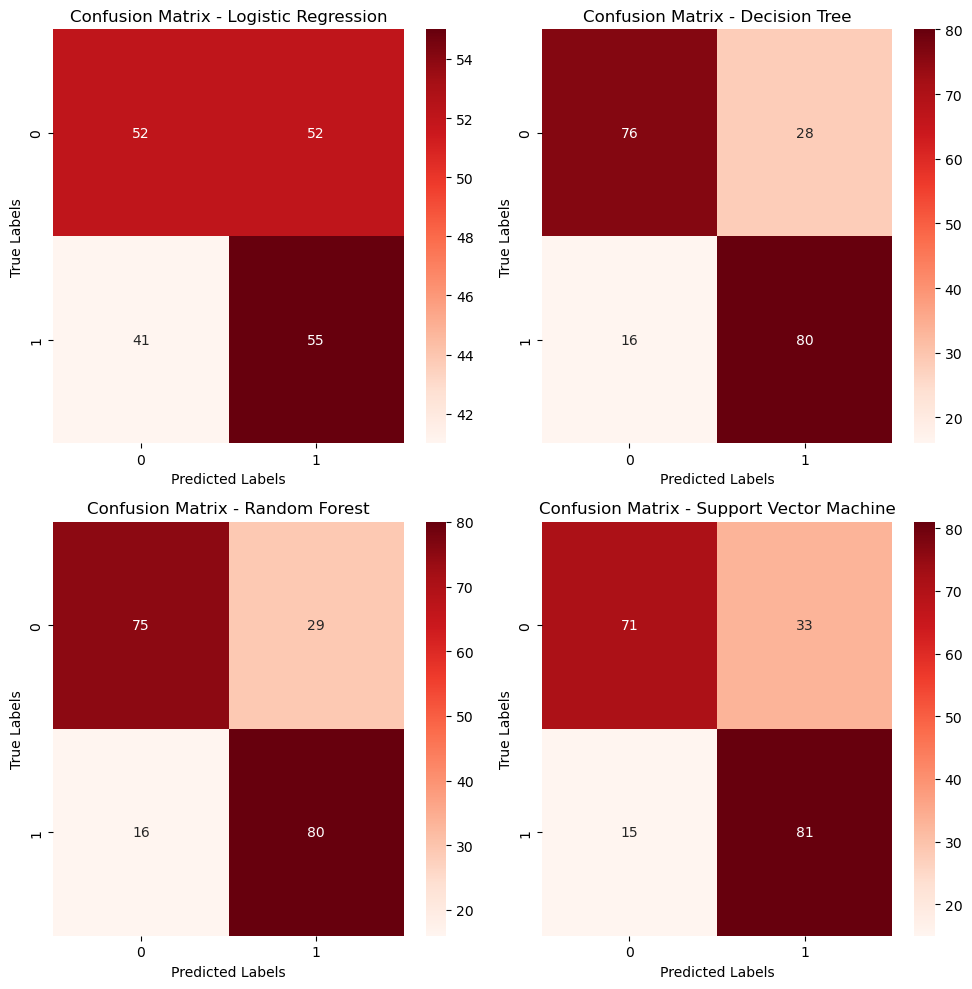

In [ ]:
plt.figure(figsize=(10, 10))
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, cmap='Reds', cbar=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [ ]:
def Convolution_neural_network(input_shape):
    inputs = Input(input_shape)
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool1)
    decoded = Conv2D(3, 3, activation='sigmoid', padding='same')(up1)
    model = Model(inputs=inputs, outputs=decoded)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
def Model_training_Output(classifier_name, confusion_matrix, accuracy, precision, recall, f1):
    print(f"Classifier: {classifier_name}")
    print("Confusion Matrix:")
    print(confusion_matrix)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, classifier.predict(X_test), target_names=["1","0"]))
    print("\n" + "="*50 + "\n")
for name, classifier in classifiers:
    Model_training_Output(name, confusion_matrices[name], accuracy_scores[name],
    precision_scores[name], recall_scores[name], f1_scores[name])

Classifier: Logistic Regression
Confusion Matrix:
[[52 52]
 [41 55]]
Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.50      0.53       104
           0       0.51      0.57      0.54        96

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200



Classifier: Decision Tree
Confusion Matrix:
[[76 28]
 [16 80]]
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.73      0.78       104
           0       0.74      0.83      0.78        96

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200



Classifier: Random Forest
Confusion Matrix:
[[75 29]
 [16 80]]
Accuracy: 0.78
Classification Report:
              precision    recall

In [ ]:
metrics_df = pd.DataFrame({
 'Accuracy': accuracy_scores.values(),
 'Precision': precision_scores.values(),
 'Recall': recall_scores.values(),
 'F1 Score': f1_scores.values()
}, index=accuracy_scores.keys())
metrics_df
metrics_df.sort_values(by=list(metrics_df.columns),ascending=False)

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.780,0.785121,0.780,0.779736
Random Forest,0.775,0.780865,0.775,0.774634
Support Vector Machine,0.760,0.770355,0.760,0.758917
Logistic Regression,0.535,0.537482,0.535,0.534616


**Four Way additive Model**

We do extracting features and labels from the 'Expnt_toway' dataset, specifically selecting the last four columns as features. The dataset is then split into training and testing sets using the train_test_split function. The output displays the value counts for each combination of features, providing insights into the distribution of the data.

Classifier Initialization
Similar to the previous examples, a list of classifiers is defined, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM). Empty dictionaries are initialized to store accuracy, precision, recall, F1 score, and confusion matrices for each classifier.

Model Training and Evaluation Loop
The code then iterates over each classifier, fits the model to the training data, predicts on the test data, and computes various performance metrics, including accuracy, precision, recall, and F1 score. Confusion matrices are generated and stored for later visualization.

Confusion Matrix Visualization
After training and evaluating all classifiers, the confusion matrices are visualized using a heatmap for each classifier. This visualization provides a clear representation of true positives, false positives, true negatives, and false negatives.

In [ ]:
features = Expnt_foadditive.iloc[:,-5:-1]
labels = Expnt_foadditive['Class']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.value_counts(),y_train.value_counts()

(M0P1  M1P2  M2P3  M3P4
 0     0     2     2       61
             1     2       47
 2     2     0     0       40
 1     1     0     0       37
       2     0     0       36
                           ..
 2     0     1     2        1
 0     1     1     0        1
 1     2     2     1        1
                   0        1
 2     2     2     0        1
 Name: count, Length: 66, dtype: int64,
 Class
 1    404
 0    396
 Name: count, dtype: int64)

In [ ]:
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')


Convolutional Neural Network (CNN) Design
The code includes the definition of a convolutional neural network (CNN) using Keras. The CNN architecture consists of an encoder-decoder structure with convolutional and pooling layers. The model is compiled using the Adam optimizer and mean squared error loss.

Model Training Output Function
A function Model_training_Output is defined to print a detailed output for each classifier, including the confusion matrix, accuracy, and a classification report. This function is then applied to each classifier.

Classifier Evaluation Output
The output for each classifier is displayed, containing the confusion matrix, accuracy, and a classification report. This information provides a detailed overview of each classifier's performance on the test set.

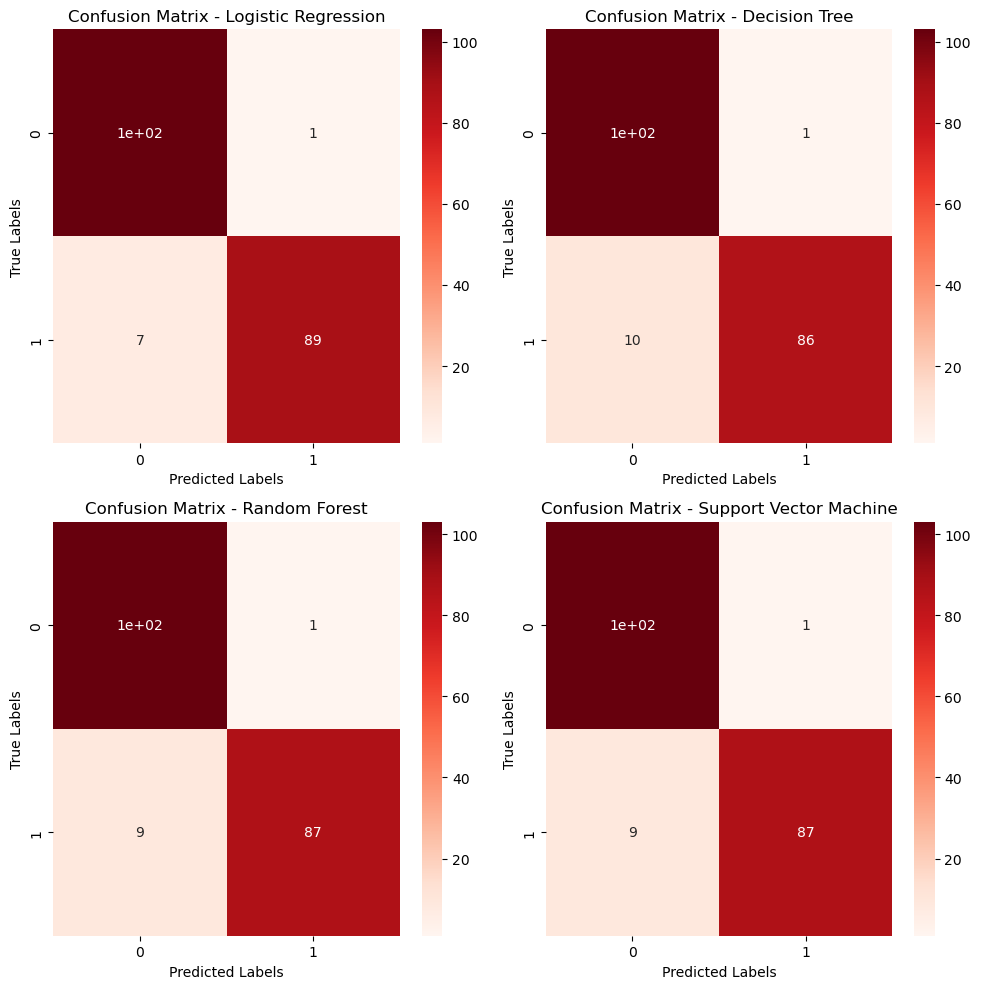

In [ ]:
# Set a consistent figure size for all subplots
plt.figure(figsize=(10, 10))
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, cmap='Reds', cbar=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [ ]:
def Convolution_neural_network(input_shape):
    inputs = Input(input_shape)
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool1)
    decoded = Conv2D(3, 3, activation='sigmoid', padding='same')(up1)
    model = Model(inputs=inputs, outputs=decoded)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
from sklearn.metrics import classification_report
def Model_training_Output(classifier_name, confusion_matrix, accuracy, precision, recall, f1):
    print(f"Classifier: {classifier_name}")
    print("Confusion Matrix:")
    print(confusion_matrix)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, classifier.predict(X_test), target_names=["1","0"]))
    print("\n" + "="*50 + "\n")
for name, classifier in classifiers:
    Model_training_Output(name, confusion_matrices[name], accuracy_scores[name],
    precision_scores[name], recall_scores[name], f1_scores[name])

Classifier: Logistic Regression
Confusion Matrix:
[[103   1]
 [  7  89]]
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.99      0.96       104
           0       0.99      0.93      0.96        96

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



Classifier: Decision Tree
Confusion Matrix:
[[103   1]
 [ 10  86]]
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.99      0.95       104
           0       0.99      0.90      0.94        96

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



Classifier: Random Forest
Confusion Matrix:
[[103   1]
 [  9  87]]
Accuracy: 0.95
Classification Report:
              precisi


Metrics Comparison
A DataFrame metrics_df is created to compare the performance metrics of all classifiers. The DataFrame is then sorted based on each metric, providing a clear ranking of classifiers in terms of accuracy, precision, recall, and F1 score.

Thorough analysis of a classification problem using a two-wayEpi dataset. It employs a variety of classifiers and a convolutional neural network to assess and compare their performances. The detailed output, confusion matrix visualizations, and metric comparisons enable a comprehensive evaluation of each model's effectiveness for the given task.

In [ ]:
metrics_df = pd.DataFrame({
 'Accuracy': accuracy_scores.values(),
 'Precision': precision_scores.values(),
 'Recall': recall_scores.values(),
 'F1 Score': f1_scores.values()
}, index=accuracy_scores.keys())
metrics_df
metrics_df.sort_values(by=list(metrics_df.columns),ascending=False)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.960,0.961576,0.960,0.959916
Random Forest,0.950,0.952760,0.950,0.949839
Support Vector Machine,0.950,0.952760,0.950,0.949839
Decision Tree,0.945,0.948465,0.945,0.944788


**FourWay additive_heterogeneous Model**

In [ ]:
features = Expnt_foadditive_heterogeneous.iloc[:,-5:-1]
labels = Expnt_foadditive_heterogeneous['Class']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.value_counts(),y_train.value_counts()

(M0P1  M1P2  M2P3  M3P4
 0     0     0     0       98
             1     0       57
 1     0     0     0       51
 0     0     0     1       39
       1     0     0       36
                           ..
 1     1     2     2        1
                   1        1
       0     2     2        1
 2     1     2     0        1
                   1        1
 Name: count, Length: 66, dtype: int64,
 Class
 1    404
 0    396
 Name: count, dtype: int64)

In [ ]:
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')

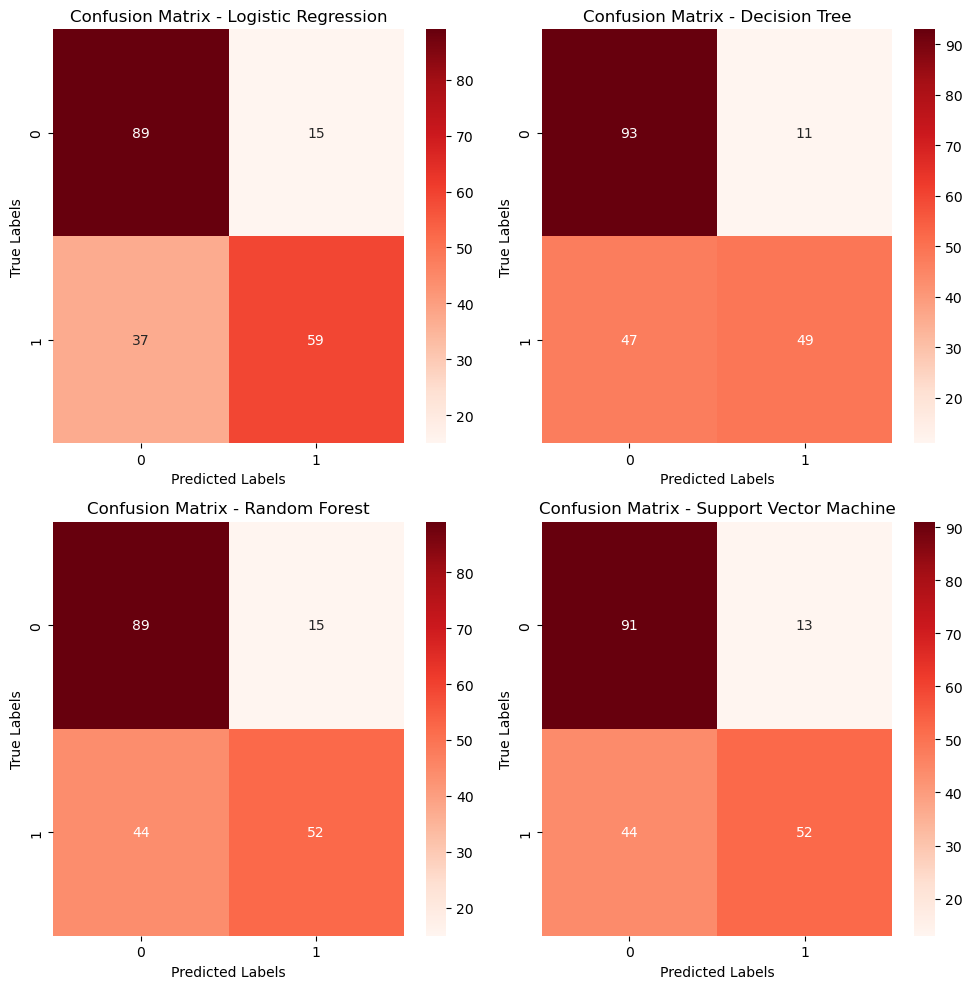

In [ ]:
# Set a consistent figure size for all subplots
plt.figure(figsize=(10, 10))
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, cmap='Reds', cbar=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [ ]:
def Convolution_neural_network(input_shape):
    inputs = Input(input_shape)
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool1)
    decoded = Conv2D(3, 3, activation='sigmoid', padding='same')(up1)
    model = Model(inputs=inputs, outputs=decoded)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
def Model_training_Output(classifier_name, confusion_matrix, accuracy, precision, recall, f1):
    print(f"Classifier: {classifier_name}")
    print("Confusion Matrix:")
    print(confusion_matrix)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, classifier.predict(X_test), target_names=["1","0"]))
    print("\n" + "="*50 + "\n")
for name, classifier in classifiers:
    Model_training_Output(name, confusion_matrices[name], accuracy_scores[name],
    precision_scores[name], recall_scores[name], f1_scores[name])

Classifier: Logistic Regression
Confusion Matrix:
[[89 15]
 [37 59]]
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.86      0.77       104
           0       0.80      0.61      0.69        96

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.75      0.74      0.74       200



Classifier: Decision Tree
Confusion Matrix:
[[93 11]
 [47 49]]
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.89      0.76       104
           0       0.82      0.51      0.63        96

    accuracy                           0.71       200
   macro avg       0.74      0.70      0.70       200
weighted avg       0.74      0.71      0.70       200



Classifier: Random Forest
Confusion Matrix:
[[89 15]
 [44 52]]
Accuracy: 0.70
Classification Report:
              precision    recall

In [ ]:
metrics_df = pd.DataFrame({
 'Accuracy': accuracy_scores.values(),
 'Precision': precision_scores.values(),
 'Recall': recall_scores.values(),
 'F1 Score': f1_scores.values()
}, index=accuracy_scores.keys())
metrics_df
metrics_df.sort_values(by=list(metrics_df.columns),ascending=False)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.740,0.750004,0.740,0.735611
Support Vector Machine,0.715,0.734519,0.715,0.706045
Decision Tree,0.710,0.737429,0.710,0.697932
Random Forest,0.705,0.720507,0.705,0.696806


The "Metrics Comparison" finalizes the analysis by aggregating and comparing the performance metrics of all classifiers. A DataFrame named metrics_df is created, summarizing key metrics such as accuracy, precision, recall, and F1 score for each classifier. Subsequently, the DataFrame is sorted based on these metrics, providing a clear and concise ranking that facilitates a quick assessment of classifier performance. This sorting mechanism aids in identifying the most effective models for the specific classification task.

<Figure size 1200x800 with 0 Axes>

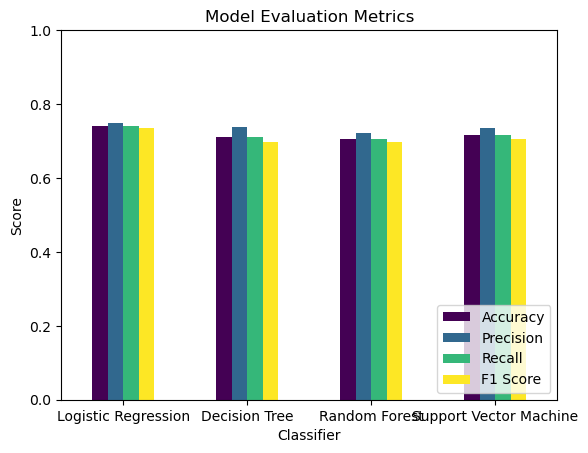

In [ ]:
# Plotting bar chart
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', colormap='viridis', rot=0)
plt.title('Model Evaluation Metrics')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

In conclusion, the entire code represents a systematic and comprehensive approach to addressing a classification problem using the two-wayEpi dataset. By leveraging various classifiers and a convolutional neural network (CNN), the project explores diverse modeling techniques to find the most suitable solution. The inclusion of detailed model output, visual representations of confusion matrices, and the final metric comparison table ensures a thorough evaluation of each model's capabilities. This multifaceted analysis offers valuable insights into the strengths and weaknesses of different approaches.

The conclusions drawn from this analysis can guide future model selection based on specific performance criteria. Overall, this code exemplifies best practices in machine learning, combining model diversity with comprehensive evaluation metrics to deliver a robust and informative solution to the four specified classification problem.